In [358]:
# Classification for Email Spam

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
# Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore")
from datasets import load_dataset

# Load the dataset from Hugging Face Hub
ds = load_dataset("UniqueData/email-spam-classification")

# Check what’s inside
print(ds)
print(ds["train"][0])  # first example


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wajid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wajid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


DatasetDict({
    train: Dataset({
        features: ['title', 'text', 'type'],
        num_rows: 84
    })
})
{'title': '?? the secrets to SUCCESS', 'text': "Hi James,\n\nHave you claim your complimentary gift yet?\n\nI've compiled in here a special astrology gift that predicts everything about you in the future?\n\nThis is your enabler to take the correct actions now.\n\n>> Click here to claim your copy now >>\n\nClaim yours now, and thank me later.\n\n\nLove,\nHeather", 'type': 'spam'}


In [359]:
print(ds)


DatasetDict({
    train: Dataset({
        features: ['title', 'text', 'type'],
        num_rows: 84
    })
})


In [360]:
train_ds = ds["train"]
print(train_ds)


Dataset({
    features: ['title', 'text', 'type'],
    num_rows: 84
})


In [361]:
print(train_ds[0])          # first row
print(train_ds[:5])         # first 5 rows


{'title': '?? the secrets to SUCCESS', 'text': "Hi James,\n\nHave you claim your complimentary gift yet?\n\nI've compiled in here a special astrology gift that predicts everything about you in the future?\n\nThis is your enabler to take the correct actions now.\n\n>> Click here to claim your copy now >>\n\nClaim yours now, and thank me later.\n\n\nLove,\nHeather", 'type': 'spam'}
{'title': ['?? the secrets to SUCCESS', '?? You Earned 500 GCLoot Points', '?? Your GitHub launch code', '[The Virtual Reward Center] Re: ** Clarifications', '10-1 MLB Expert Inside, Plus Everything You Need To Have A BLOCKBUSTER Saturday'], 'text': ["Hi James,\n\nHave you claim your complimentary gift yet?\n\nI've compiled in here a special astrology gift that predicts everything about you in the future?\n\nThis is your enabler to take the correct actions now.\n\n>> Click here to claim your copy now >>\n\nClaim yours now, and thank me later.\n\n\nLove,\nHeather", '\nalt_text\nCongratulations, you just earned\

In [362]:
import pandas as pd

df = train_ds.to_pandas()
df.head()


,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [363]:
df.shape
df.isnull().sum()
df.duplicated().sum()
df = df.drop_duplicates(keep='first')
df.shape
df.head(5)


,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


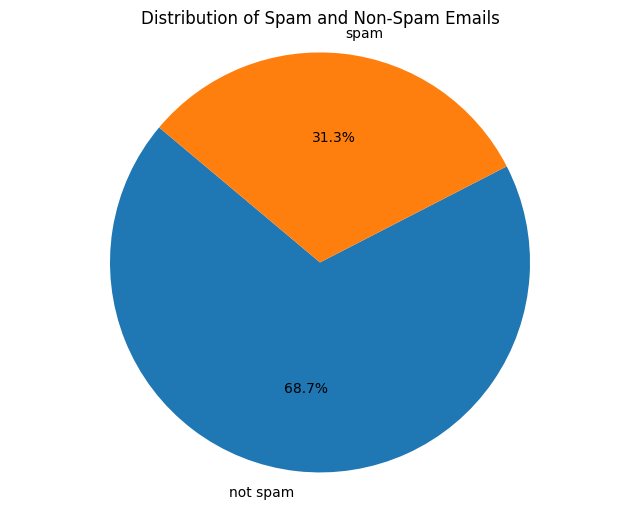

In [364]:
plt.figure(figsize=(8, 6))
plt.pie(df['type'].value_counts(), 
        labels=df['type'].value_counts().index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal')
plt.show()


Average Length of Spam Emails: 746.4615384615385
Average Length of Ham Emails: 887.2456140350877


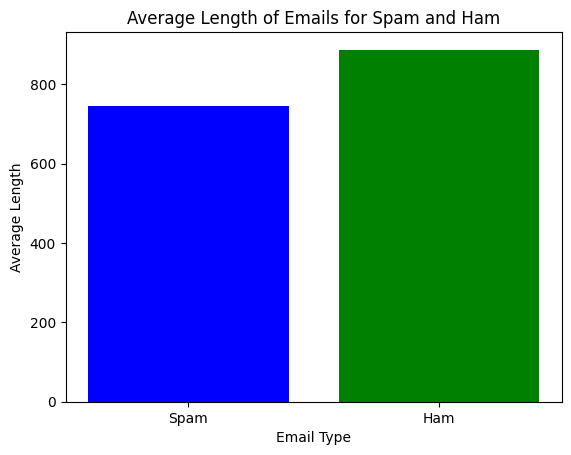

In [365]:
# Average Length of Emails for Spam and Ham

df['Length'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(word_tokenize).apply(len)
df['num_sentence'] = df['text'].apply(sent_tokenize).apply(len)

df.head(2)

avg_length_spam = df[df['type'] == 'spam']['Length'].mean()
avg_length_ham = df[df['type'] == 'not spam']['Length'].mean()

print("Average Length of Spam Emails:", avg_length_spam)
print("Average Length of Ham Emails:", avg_length_ham)

plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham], color=['blue', 'green'])
plt.title('Average Length of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()


Average Words of Spam Emails: 153.15384615384616
Average Words of Ham Emails: 164.9298245614035


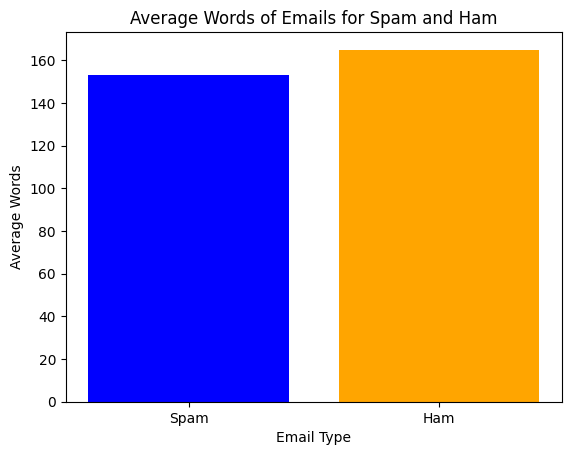

In [366]:
# Average Word of Emails for Spam and Ham
avg_word_spam = df[df['type'] == 'spam']['num_words'].mean()
avg_word_ham = df[df['type'] == 'not spam']['num_words'].mean()

print("Average Words of Spam Emails:", avg_word_spam)
print("Average Words of Ham Emails:", avg_word_ham)

plt.bar(['Spam', 'Ham'], [avg_word_spam, avg_word_ham], color=['blue', 'orange'])
plt.title('Average Words of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Words')
plt.show()




Average Sentences of Spam Emails: 9.0
Average Sentences of Ham Emails: 8.543859649122806


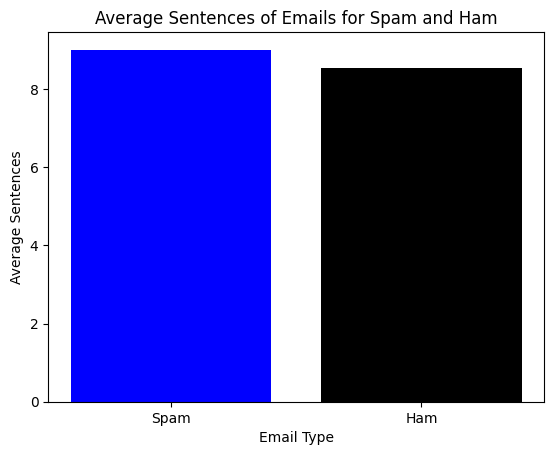

In [367]:
# Average Sentence of Emails for Spam and Ham

avg_sentence_spam = df[df['type'] == 'spam']['num_sentence'].mean()
avg_sentence_ham = df[df['type'] == 'not spam']['num_sentence'].mean()

print("Average Sentences of Spam Emails:", avg_sentence_spam)
print("Average Sentences of Ham Emails:", avg_sentence_ham)

plt.bar(['Spam', 'Ham'], [avg_sentence_spam, avg_sentence_ham], color=['blue', 'black'])
plt.title('Average Sentences of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Sentences')
plt.show()



Correlation coefficient between email length and spam classification: -0.06598878052003988


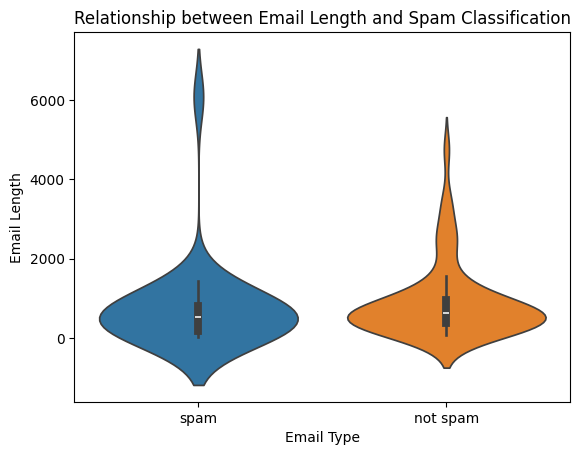

In [368]:
#  Relationship between Length and Spam
# Correlation: email length vs spam classification
correlation = df['Length'].corr((df['type'] == 'spam').astype(int))
print("Correlation coefficient between email length and spam classification:", correlation)

# Violin plot
sns.violinplot(data=df, x='type', y='Length', hue='type')
plt.xlabel('Email Type')
plt.ylabel('Email Length')
plt.title('Relationship between Email Length and Spam Classification')
plt.show()



The Relationship between Features are:
                 Length  num_words  num_sentence
Length        1.000000   0.992164      0.917855
num_words     0.992164   1.000000      0.945980
num_sentence  0.917855   0.945980      1.000000


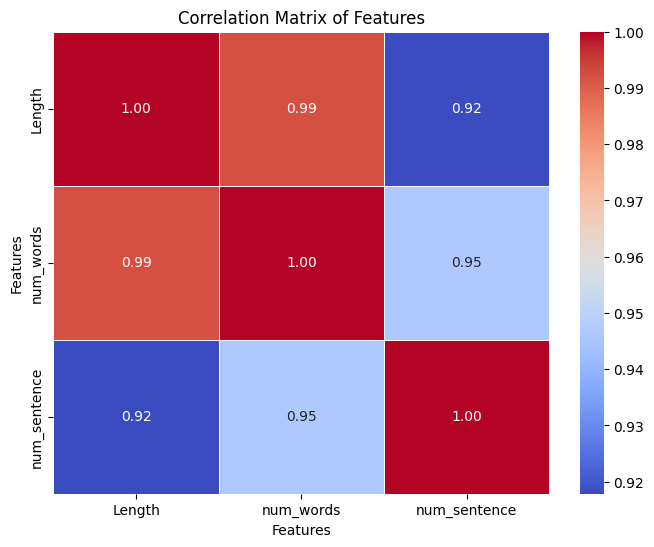

In [369]:
# Relationship between Features

# Correlation matrix between numerical features
correlation_matrix = df[['Length', 'num_words', 'num_sentence']].corr()
print("The Relationship between Features are:\n", correlation_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


In [370]:
# Data Preprocessing

# Lowercasing
df['transform_text'] = df['text'].str.lower()

# Tokenization
df['transform_text'] = df['transform_text'].apply(word_tokenize)

# Removing special characters
df['transform_text'] = df['transform_text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

# Removing stop words and punctuation
stop_words = set(stopwords.words('english'))
df['transform_text'] = df['transform_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

# Stemming
ps = PorterStemmer()
df['transform_text'] = df['transform_text'].apply(lambda x: [ps.stem(word) for word in x])

# Convert the preprocessed text back to string
df['transform_text'] = df['transform_text'].apply(lambda x: ' '.join(x))

# Display the preprocessed data
(df[['text', 'transform_text']].head())


,text,transform_text
0,"Hi James,\n\nHave you claim your complimentary...",hi jame claim complimentari gift yet compil sp...
1,"\nalt_text\nCongratulations, you just earned\n...",alttext congratul earn 500 complet follow offe...
2,"Here's your GitHub launch code, @Mortyj420!\n ...",github launch code mortyj420 octocat stand nex...
3,"Hello,\n \nThank you for contacting the Virtua...",hello thank contact virtual reward center virt...
4,"Hey Prachanda Rawal,\n\nToday's newsletter is ...",hey prachanda rawal today newslett jampack eve...


Top 10 Most Common Words in Spam Emails:
click: 20 occurrences
today: 16 occurrences
run: 13 occurrences
win: 12 occurrences
game: 11 occurrences
get: 11 occurrences
take: 10 occurrences
nt: 10 occurrences
earn: 10 occurrences
file: 10 occurrences


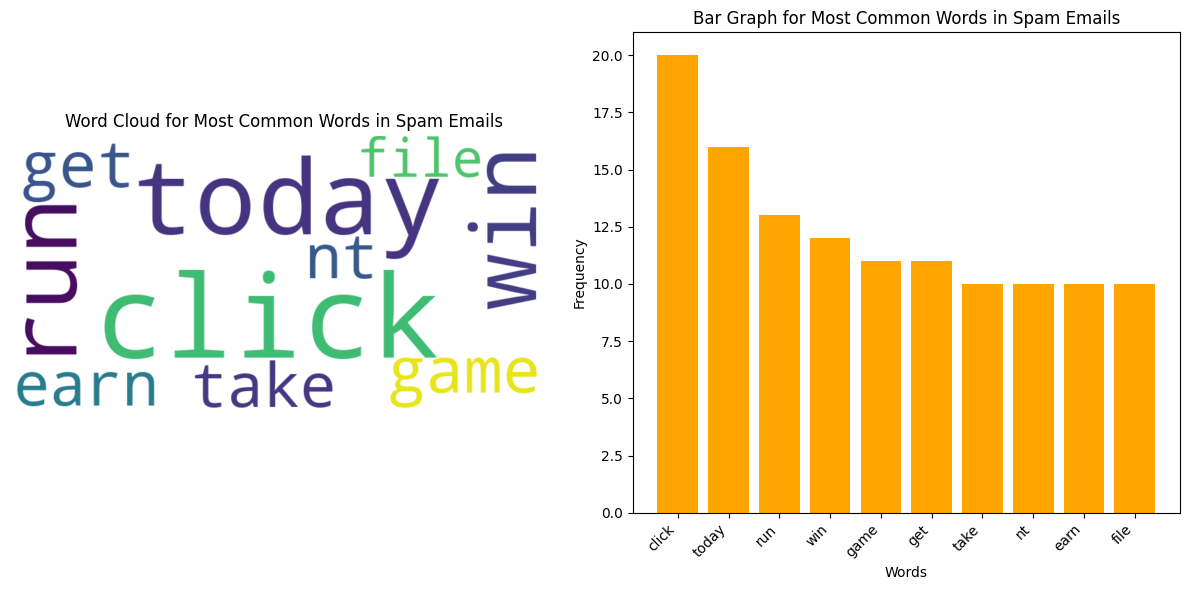

In [371]:
#  Common Words in Spam Emails

# Select spam emails
spam_emails = df[df['type'] == 'spam']['transform_text']

# Tokenize the text in spam emails
spam_words = ' '.join(spam_emails).split()

# Count occurrences of each word
word_counts = Counter(spam_words)

# Find the most common words
most_common_words = word_counts.most_common(10)

print("Top 10 Most Common Words in Spam Emails:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Plot Word Cloud and Bar Graph
plt.figure(figsize=(12, 6))

# Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Spam Emails')
plt.axis('off')

# Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



Top 10 Most Common Words in Ham Emails:
email: 55 occurrences
compani: 43 occurrences
account: 43 occurrences
pleas: 41 occurrences
servic: 35 occurrences
logo: 34 occurrences
custom: 27 occurrences
use: 27 occurrences
work: 25 occurrences
thank: 24 occurrences


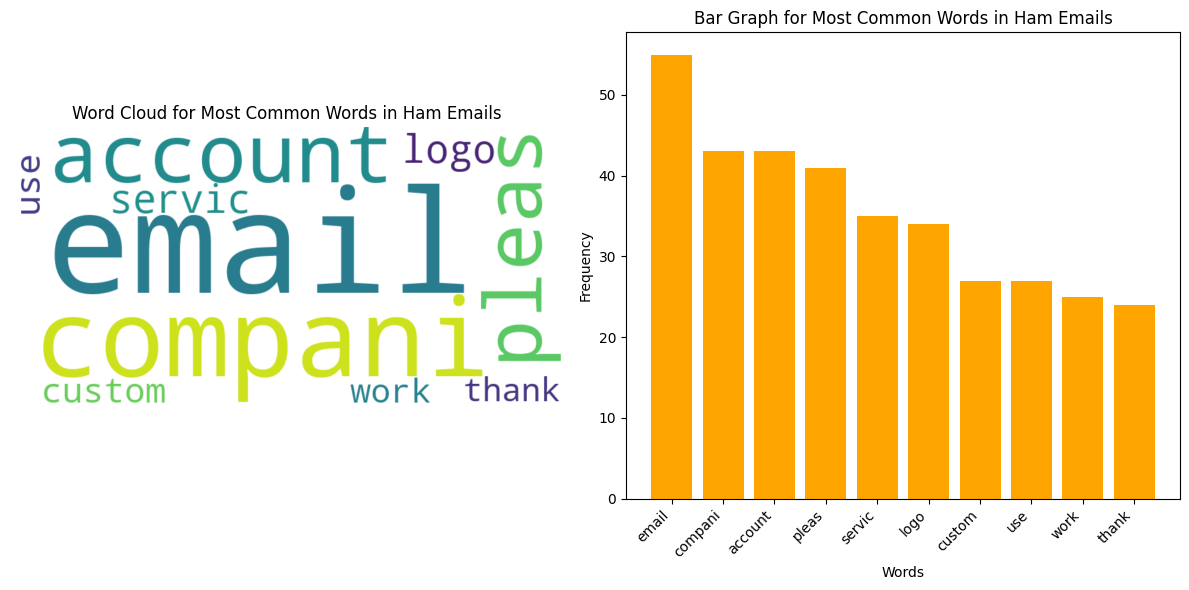

In [372]:
#  Common Words in Ham Emails

# Select ham emails
ham_emails = df[df['type'] == 'not spam']['transform_text']

# Tokenize the text in ham emails
ham_words = ' '.join(ham_emails).split()

# Count occurrences of each word
word_counts = Counter(ham_words)

# Find the most common words
most_common_words = word_counts.most_common(10)

print("Top 10 Most Common Words in Ham Emails:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Plot Word Cloud and Bar Graph
plt.figure(figsize=(12, 6))

# Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Ham Emails')
plt.axis('off')

# Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Ham Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [373]:
# Preparing Data for Machine Learning: 
# Label Encoding and Vectorization.

# Encode the target column
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])  # spam=1, not spam=0

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text']).toarray()   # use 'text' column
y = df['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())


X_train shape: (66, 2851)
X_test shape: (17, 2851)
y_train distribution:
 type
0    46
1    20
Name: count, dtype: int64


In [374]:
# Handle Class Imbalance
# -------------------------------
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [375]:
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


In [376]:
# Model Training
# -------------------------------
# SVM
svc = SVC(class_weight='balanced', probability=True, random_state=42)
svc.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [377]:
# Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [378]:
# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [379]:
# Voting Classifier (SVM + RF)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

ensemble = VotingClassifier(estimators=[('svc', svc), ('rf', rf)], voting='soft')
ensemble.fit(X_train, y_train)

,estimators,"[('svc', ...), ('rf', ...)]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


In [380]:
# Evaluation Function
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
 
def evaluate_model(model, X_test, y_test, threshold=0.5):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]  # probability for "spam"
        y_pred = (y_proba >= threshold).astype(int)
    else:
        y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall:", round(recall_score(y_test, y_pred), 4))
    print("F1 Score:", round(f1_score(y_test, y_pred), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-"*50)


In [381]:
# Evaluate Models
# -------------------------------
print("=== Default Threshold (0.5) ===")
evaluate_model(svc, X_test, y_test)
evaluate_model(rf, X_test, y_test)
evaluate_model(nb, X_test, y_test)
evaluate_model(ensemble, X_test, y_test)

print("=== Adjusted Threshold for SVM (0.3) ===")
evaluate_model(svc, X_test, y_test, threshold=0.3)

=== Default Threshold (0.5) ===
Model: SVC
Accuracy: 0.8696
Precision: 0.9
Recall: 0.8182
F1 Score: 0.8571
Confusion Matrix:
 [[11  1]
 [ 2  9]]
--------------------------------------------------
Model: RandomForestClassifier
Accuracy: 0.913
Precision: 0.9091
Recall: 0.9091
F1 Score: 0.9091
Confusion Matrix:
 [[11  1]
 [ 1 10]]
--------------------------------------------------
Model: MultinomialNB
Accuracy: 0.913
Precision: 0.8462
Recall: 1.0
F1 Score: 0.9167
Confusion Matrix:
 [[10  2]
 [ 0 11]]
--------------------------------------------------
Model: VotingClassifier
Accuracy: 0.8696
Precision: 0.9
Recall: 0.8182
F1 Score: 0.8571
Confusion Matrix:
 [[11  1]
 [ 2  9]]
--------------------------------------------------
=== Adjusted Threshold for SVM (0.3) ===
Model: SVC
Accuracy: 0.913
Precision: 0.8462
Recall: 1.0
F1 Score: 0.9167
Confusion Matrix:
 [[10  2]
 [ 0 11]]
--------------------------------------------------


Summary:

Threshold tuning improves spam recall to 100% with minimal drop in precision. Random Forest and MultinomialNB achieve ~91% accuracy, making the pipeline effective for detecting spam while maintaining balanced performance.